<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter6/KernelPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.12


# Example 6.18
## Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from math import pi
from numpy.linalg import norm, inv, eigh
print(np.__version__)

1.19.5


## Set random seed

In [3]:
np.random.seed(3434)

## Generate events

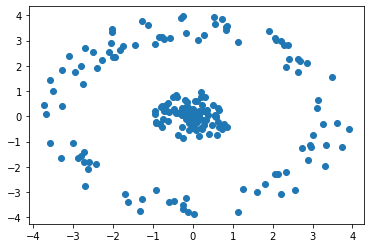

In [4]:
n  = 200
theta = np.random.uniform(0, 2*pi, n)
r = np.concatenate((np.random.uniform(0, 1.0, int(n/2)),np.random.uniform(3.0, 4.0, int(n/2))))
#np.random.shuffle(r)

x = np.zeros((2,n))
x[0] = r * np.cos(theta)
x[1] = r * np.sin(theta)
plt.scatter(x[0], x[1])
plt.show()

[1.74151069e+06 2.15247630e+01 1.24198808e+01 1.16042113e+01
 1.08796954e+01 9.30599962e+00 8.92888211e+00 8.26794751e+00
 7.67605896e+00]
(9, 200)


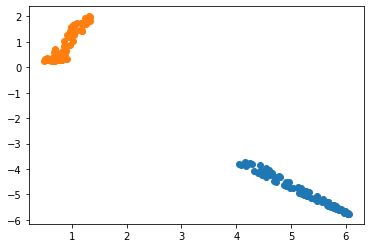

In [5]:
def k(u1,u2):
    return(np.exp(-0.5*norm(u1-u2)**2))

K = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        K[i,j] = k(x.T[i],x.T[j])

H = np.identity(n) - 1.0/n * np.ones(n) @ np.ones(n).T
XXT = H @ K @ H
eValue, eVector = eigh(XXT)
idx = eValue.argsort()[::-1]   

eValue = eValue[idx]
eVector = eVector[:,idx]

m=9

meValue = eValue[0:m]
meVector = eVector[:,0:m]
print(meValue)

zm = meVector.T @ K
print(zm.shape)

plt.scatter(zm[0][0:100], zm[1][0:100])
plt.scatter(zm[0][100:], zm[1][100:])

plt.show()


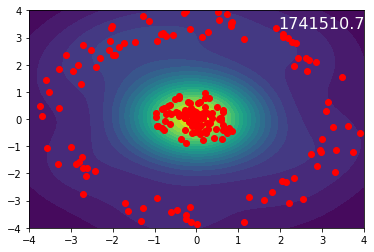

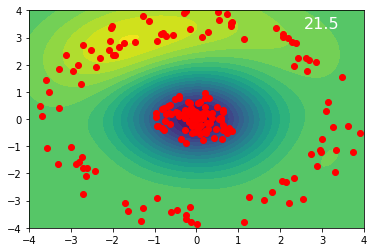

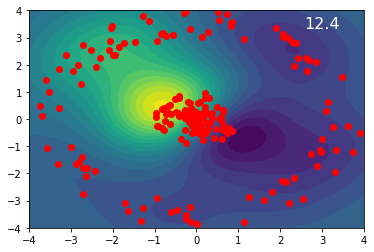

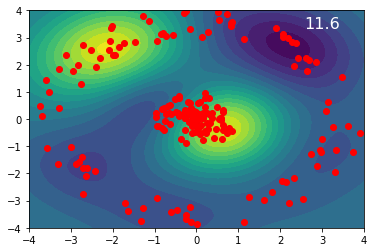

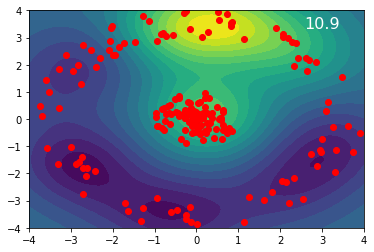

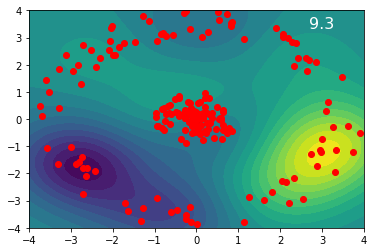

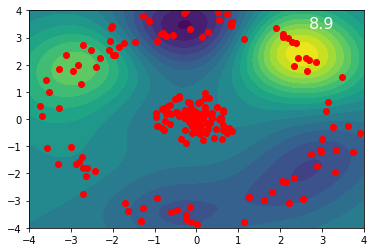

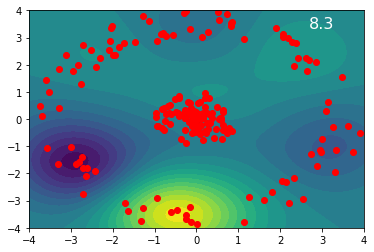

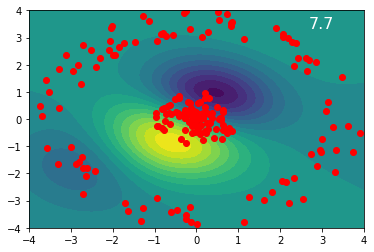

In [6]:
Ng = 100
xCon = np.linspace(-4, 4, Ng)
yCon = np.linspace(-4, 4, Ng)

X = np.zeros((Ng*Ng))
Y = np.zeros((Ng*Ng))
Z = np.zeros((m, Ng*Ng))
kk = 0
for i in range(Ng):
  for j in range(Ng):
    xx = np.array([xCon[i],yCon[j]])
    kx = np.zeros(n)
    for ii in range(n):
      kx[ii] = k(x.T[ii],xx.T)
    #print(np.max(kx))
    zz = meVector.T @ kx
    X[kk] = xCon[i]
    Y[kk] = yCon[j]
    for p in range(m):
      Z[p][kk] = zz[p]
    kk = kk + 1

for p in range(m):
  plt.contourf(X.reshape(Ng,Ng), Y.reshape(Ng,Ng), Z[p].reshape(Ng,Ng), 20)
  plt.scatter(x[0], x[1], color='red')
  plt.text(3.0, 3.5, round(meValue[p],1), ha='center', va='center', fontsize=16, color="white")
  plt.show()